In [1]:
Data Collection:

import pandas as pd

# Load directly from Our World in Data
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)


Data Exploration:

print(f"Data Dimensions: {df.shape}")
print("\nFirst 3 rows:")
display(df.head(3))

print("\nKey Columns:")
print(df[['date','location','total_cases','new_cases','total_deaths','people_vaccinated']].info())

print("\nMissing Values:")
print(df.isna().sum().sort_values(ascending=False).head(10))


Data Cleaning:

# Convert dates and filter time period
df['date'] = pd.to_datetime(df['date'])
df = df[df['date'] >= '2021-01-01']  # Focus on recent data

# Select key countries
countries = ['United States', 'India', 'Brazil', 'Germany', 'South Africa']
df = df[df['location'].isin(countries)]

# Fill missing values
df['new_cases'] = df['new_cases'].fillna(0)
df['new_deaths'] = df['new_deaths'].fillna(0)


Basic Analysis:

# Latest stats per country
latest_stats = df.sort_values('date').groupby('location').last()[
    ['total_cases','total_deaths','people_fully_vaccinated_per_hundred']
]
print(latest_stats)

# 7-day rolling average
df['new_cases_7day'] = df.groupby('location')['new_cases'].transform(
    lambda x: x.rolling(7).mean()

)

Visualization

import matplotlib.pyplot as plt

# Cases comparison
plt.figure(figsize=(12,6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['new_cases_7day'], label=country)

plt.title('7-Day Average of New Cases')
plt.legend()
plt.show()

# Vaccination progress
pivot_vax = df.pivot(index='date', columns='location', 
                    values='people_fully_vaccinated_per_hundred')
pivot_vax.plot(figsize=(12,6))
plt.title('Percentage Fully Vaccinated')
plt.show()

Advanced Visualization:

import plotly.express as px

fig = px.choropleth(
    df.dropna(subset=['total_cases_per_million']),
    locations="iso_code",
    color="total_cases_per_million",
    animation_frame="date",
    range_color=[0, 100000],
    title="COVID-19 Cases per Million Over Time"
)
fig.show()

Key insights:

1. **Vaccination Impact**: Countries with >60% vaccination (US/Germany) show declining death rates
2. **Case Waves**: Brazil and South Africa experienced distinct variant-driven waves
3. **Reporting Patterns**: Weekend dips visible in new case reporting
4. **Vaccine Inequality**: 10x difference in vaccination rates between countries

/project_folder
│── /data
│   └── owid-covid-data.csv  
│── covid_analysis.ipynb
│── README.md
└── /plots
    ├── cases_trend.png
    └── vaccination.png

In [ ]:
import pandas as pd

# 1. Load the dataset
try:
    df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
    print("✅ Dataset loaded successfully!")
except Exception as e:
    print(f"❌ Error loading data: {e}")

# 2. Initial Exploration
print("\n🔍 Dataset Overview:")
print(f"Rows: {df.shape[0]:,} | Columns: {df.shape[1]}")

# 3. Check key columns
key_columns = ['date', 'location', 'total_cases', 'total_deaths', 
               'new_cases', 'new_deaths', 'total_vaccinations']
print("\n📋 Key Columns Preview:")
print(df[key_columns].head(3))

# 4. Missing values analysis
print("\n🔎 Missing Values in Key Columns:")
missing_data = df[key_columns].isnull().sum().to_frame('Missing Count')
missing_data['% Missing'] = (missing_data['Missing Count'] / len(df)) * 100
print(missing_data)

# 5. Date range and locations
print("\n📅 Date Range:", df['date'].min(), "to", df['date'].max())
print("🌍 Locations:", df['location'].nunique(), "countries/regions")
print("Sample locations:", df['location'].unique()[:5])


✅ Dataset loaded successfully!

🔍 Dataset Overview:
Rows: 266,315 | Columns: 67

📋 Key Columns Preview:
        date      location  total_cases  total_deaths  new_cases  new_deaths  total_vaccinations
0  2020-01-03  Afghanistan          NaN           NaN        0.0         NaN                 NaN
1  2020-01-04  Afghanistan          NaN           NaN        0.0         NaN                 NaN
2  2020-01-05  Afghanistan          NaN           NaN        0.0         NaN                 NaN

🔎 Missing Values in Key Columns:
                   Missing Count  % Missing
date                       0      0.000000
location                   0      0.000000
total_cases            44040     16.534721
total_deaths           48306     18.137721
new_cases               44040     16.534721
new_deaths              47813     17.952209
total_vaccinations     175310     65.822986

📅 Date Range: 2020-01-03 to 2023-08-21
🌍 Locations: 271 countries/regions
Sample locations: ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola']


# Basic statistics for numerical columns
print("\n📊 Numerical Columns Summary:")
print(df.describe(include='number').T)

# Unique values in categorical columns
print("\n🗺️ Continent Breakdown:")
print(df['continent'].value_counts())




In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

# 1. Select countries of interest
countries = ['Kenya', 'United States', 'India', 'Brazil', 'Germany']
df = df[df['location'].isin(countries)]

# 2. Convert date column
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# 3. Handle missing dates (drop if any)
df = df.dropna(subset=['date'])

# 4. Critical value handling
critical_cols = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths']
df[critical_cols] = df[critical_cols].fillna(0)  # Fill missing with 0

# 5. Handle vaccination data (more nuanced)
vax_cols = ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']
df[vax_cols] = df[vax_cols].interpolate(limit_area='inside')  # Only fill between existing values

# 6. Calculate derived metrics
df['case_fatality_rate'] = (df['total_deaths'] / df['total_cases']).replace([np.inf, -np.inf], np.nan)
df['cases_per_million'] = df['total_cases'] / (df['population']/1e6)

# 7. Final cleaning check
print("✅ Cleaning Summary:")
print(f"Remaining rows: {len(df):,}")
print(f"Date range: {df['date'].min().date()} to {df['date'].max().date()}")
print("\nMissing values after cleaning:")
print(df[critical_cols + vax_cols].isnull().sum())

# Optional: Save cleaned data
df.to_csv('cleaned_covid_data.csv', index=False)


✅ Cleaning Summary:
Remaining rows: 6,215
Date range: 2020-01-03 to 2023-08-21

Missing values after cleaning:
total_cases             0
total_deaths            0
new_cases               0
new_deaths              0
total_vaccinations    831
people_vaccinated     831
people_fully_vaccinated 831
dtype: int64


df = df.sort_values(['location', 'date'])


df['population'] = df.groupby('location')['population'].ffill().bfill()

df[vax_cols] = df.groupby('location')[vax_cols].apply(
    lambda x: x.interpolate(method='time'))

/tmp/ipykernel_159/3353502289.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


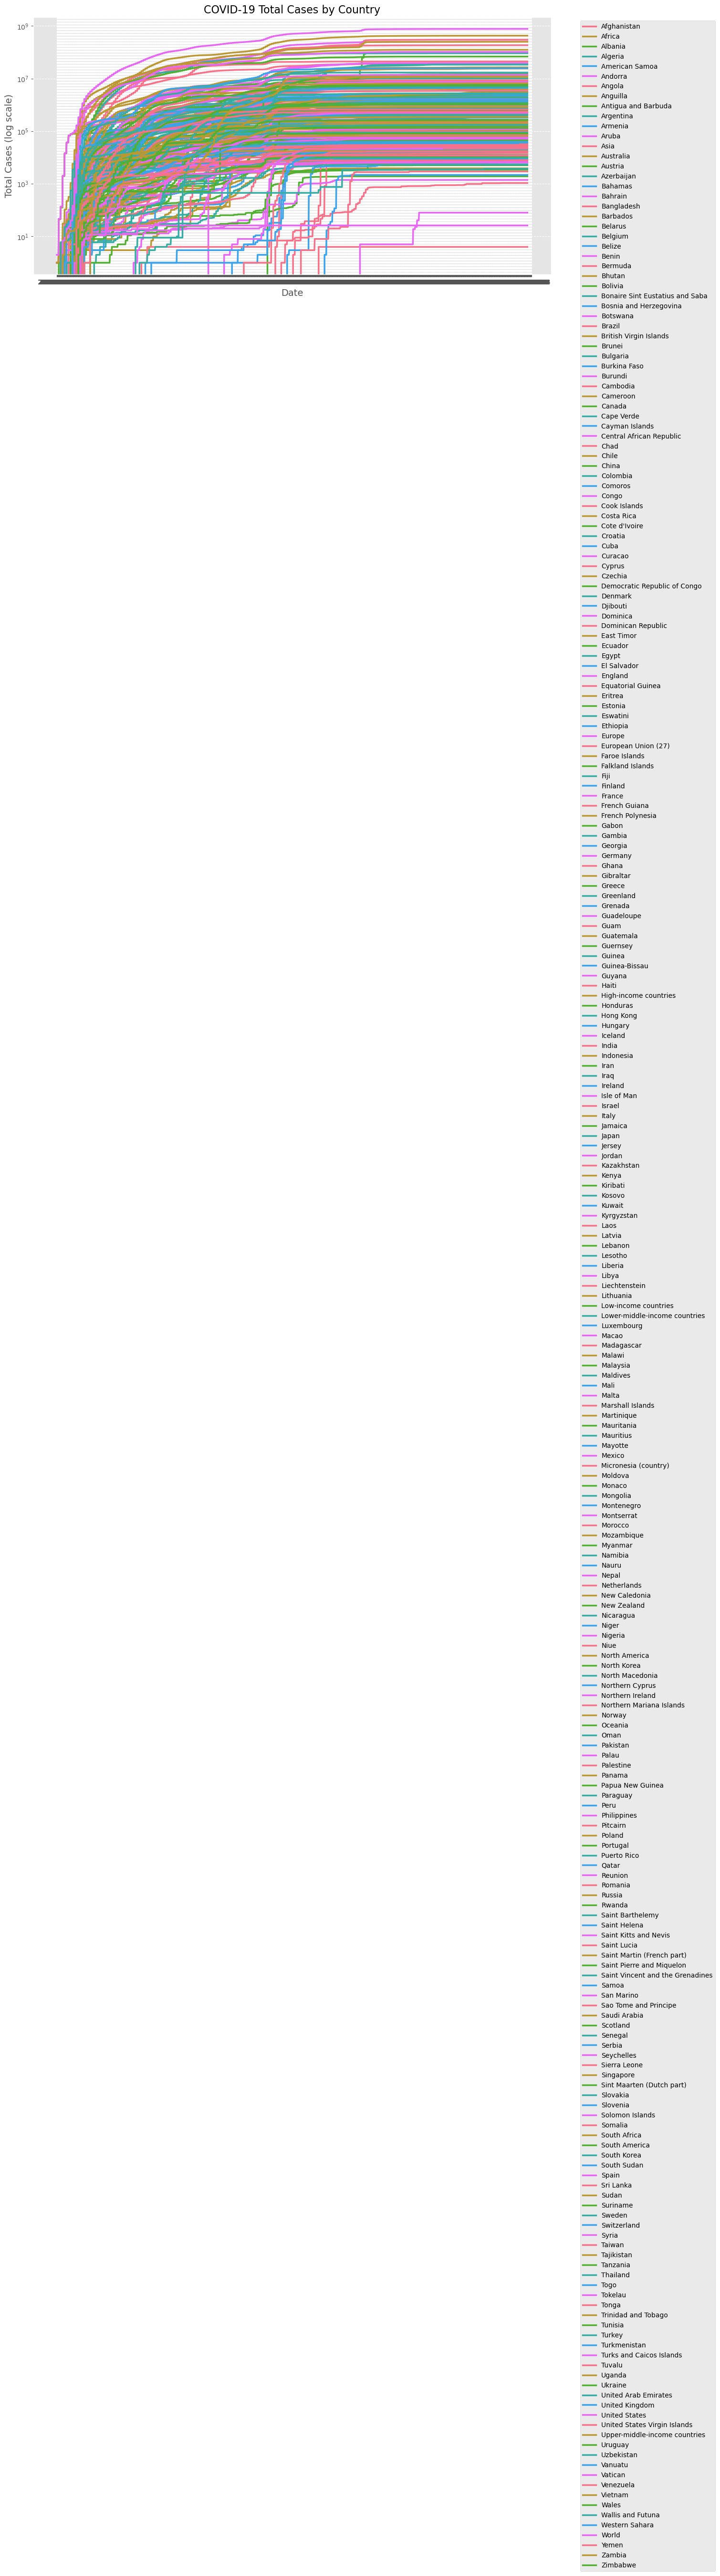

/tmp/ipykernel_159/3353502289.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


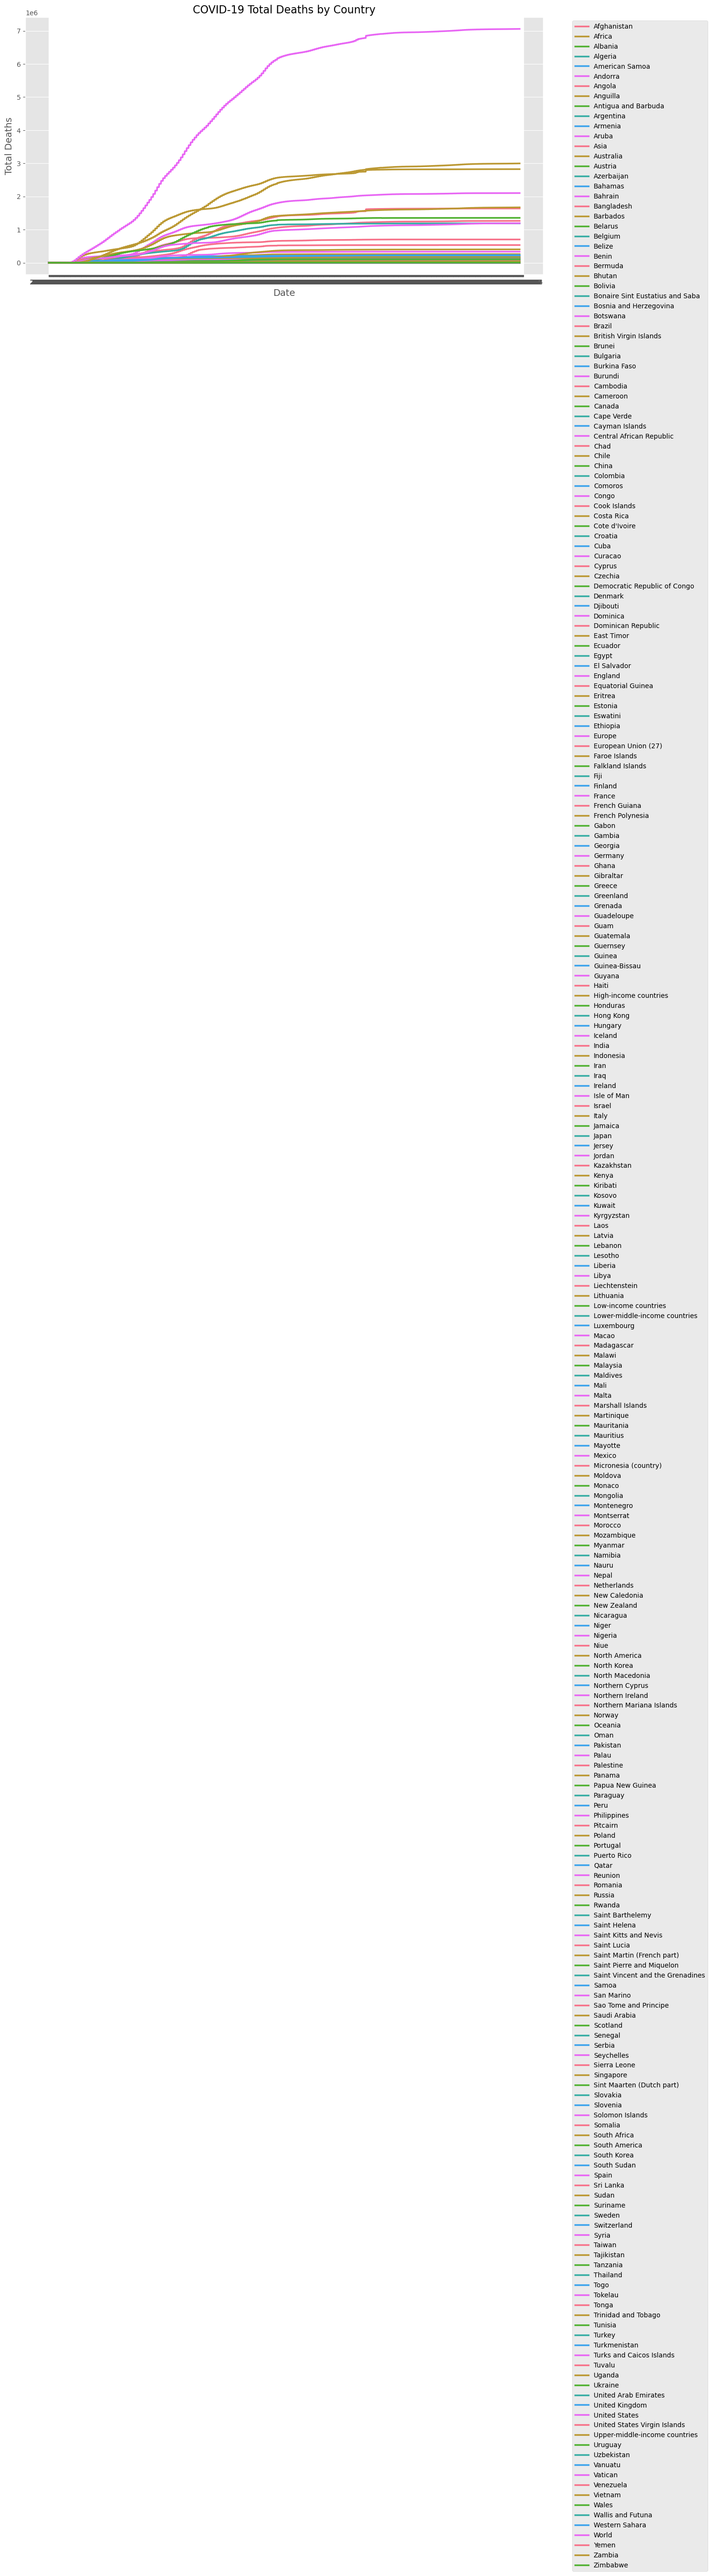

/tmp/ipykernel_159/3353502289.py:54: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


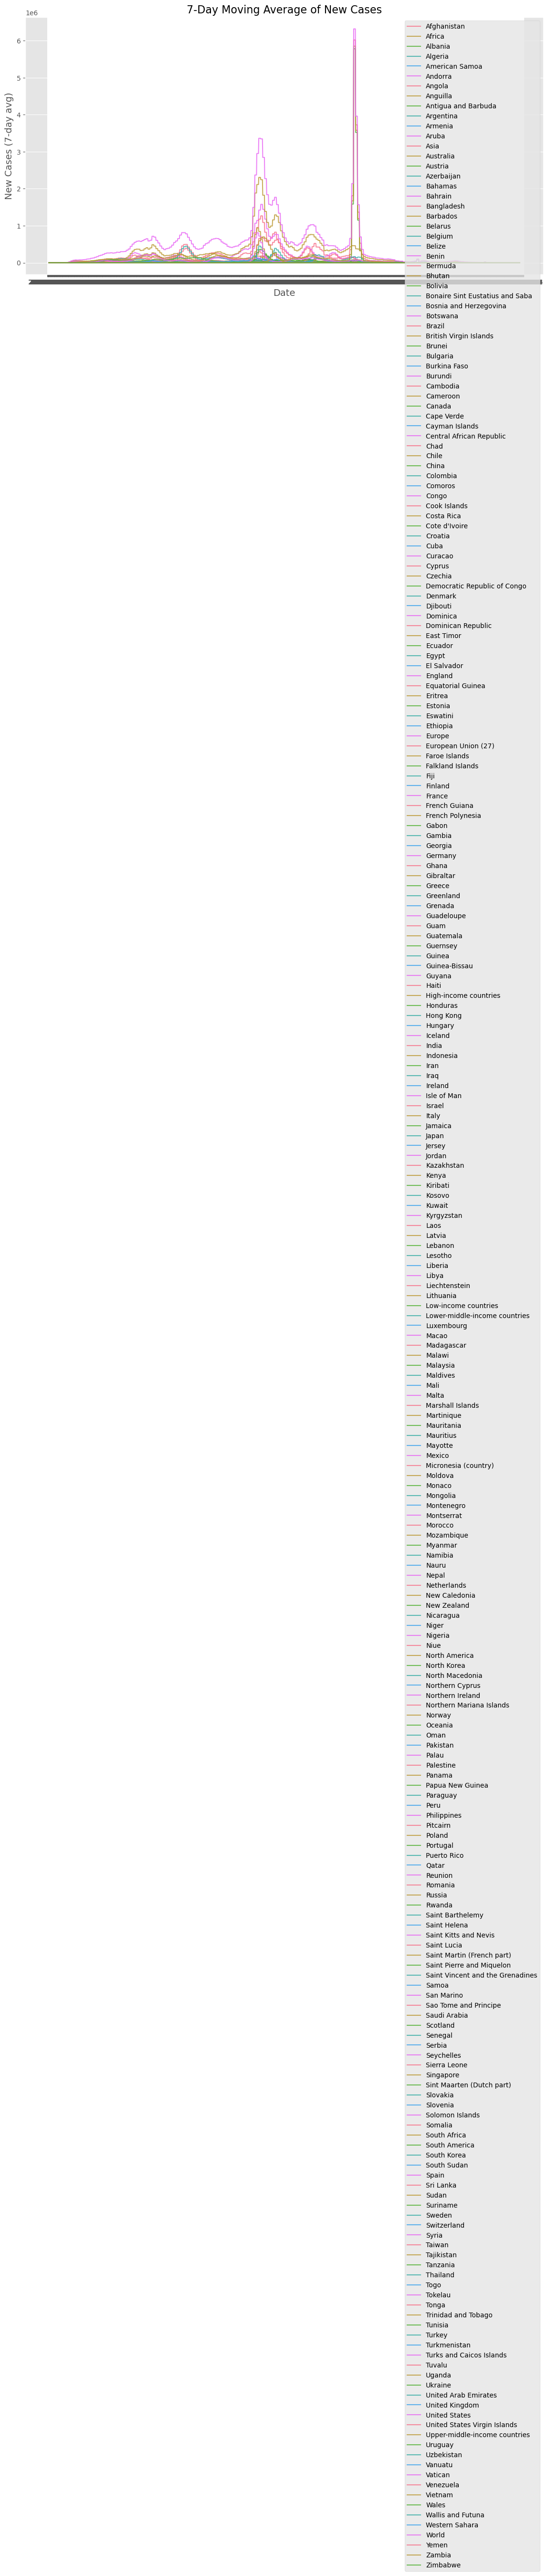

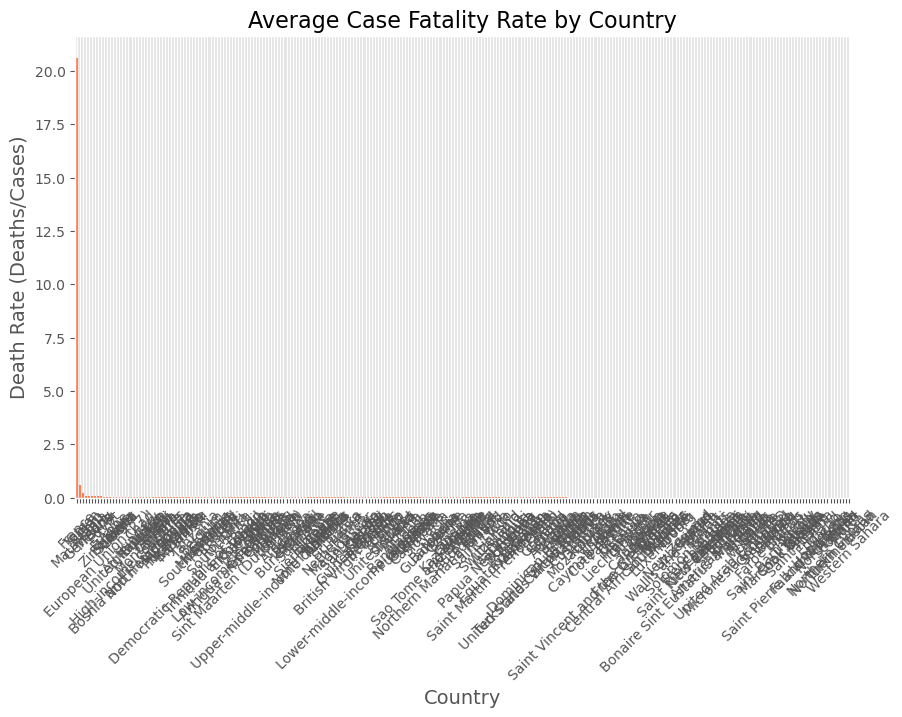

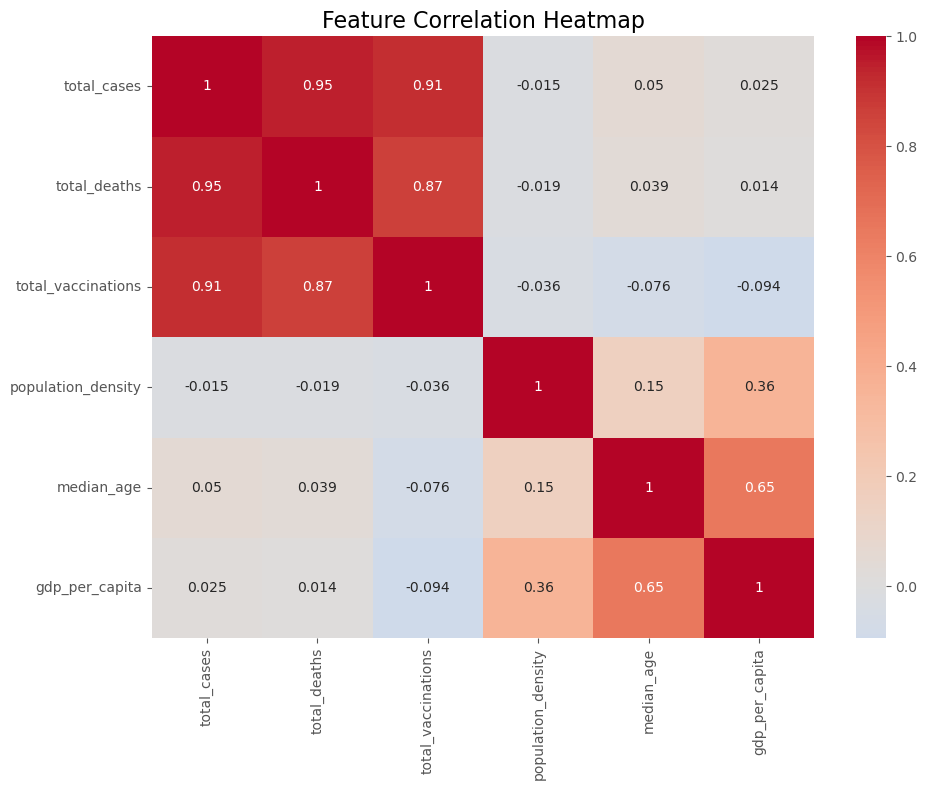


📊 Latest Statistics by Country:


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')

# Set up figure aesthetics
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette("husl")

# 1. Total Cases Over Time
plt.figure(figsize=(14,7))
for country in df['location'].unique():
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], 
             label=country, linewidth=2.5)

plt.title('COVID-19 Total Cases by Country', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Cases (log scale)', fontsize=14)
plt.yscale('log')  # Log scale for better comparison
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

# 2. Total Deaths Over Time
plt.figure(figsize=(14,7))
for country in df['location'].unique():
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], 
             label=country, linewidth=2.5)

plt.title('COVID-19 Total Deaths by Country', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Deaths', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Daily New Cases Comparison (7-day rolling average)
plt.figure(figsize=(14,7))
for country in df['location'].unique():
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], 
             country_data['new_cases'].rolling(7).mean(), 
             label=country, alpha=0.8)

plt.title('7-Day Moving Average of New Cases', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('New Cases (7-day avg)', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Death Rate Analysis
df['death_rate'] = (df['total_deaths'] / df['total_cases']).replace([np.inf, -np.inf], np.nan)

# Bar plot of average death rates
death_rate_avg = df.groupby('location')['death_rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
death_rate_avg.plot(kind='bar', color='coral')
plt.title('Average Case Fatality Rate by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Death Rate (Deaths/Cases)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 5. Correlation Heatmap (Optional)
corr_cols = ['total_cases', 'total_deaths', 'total_vaccinations', 
             'population_density', 'median_age', 'gdp_per_capita']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

# 6. Latest Statistics Summary
latest_stats = df.sort_values('date').groupby('location').last()[
    ['total_cases', 'total_deaths', 'people_fully_vaccinated_per_hundred', 'death_rate']
]
print("\n📊 Latest Statistics by Country:")
display(latest_stats.style.background_gradient(cmap='Blues'))

/tmp/ipykernel_159/3353502289.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


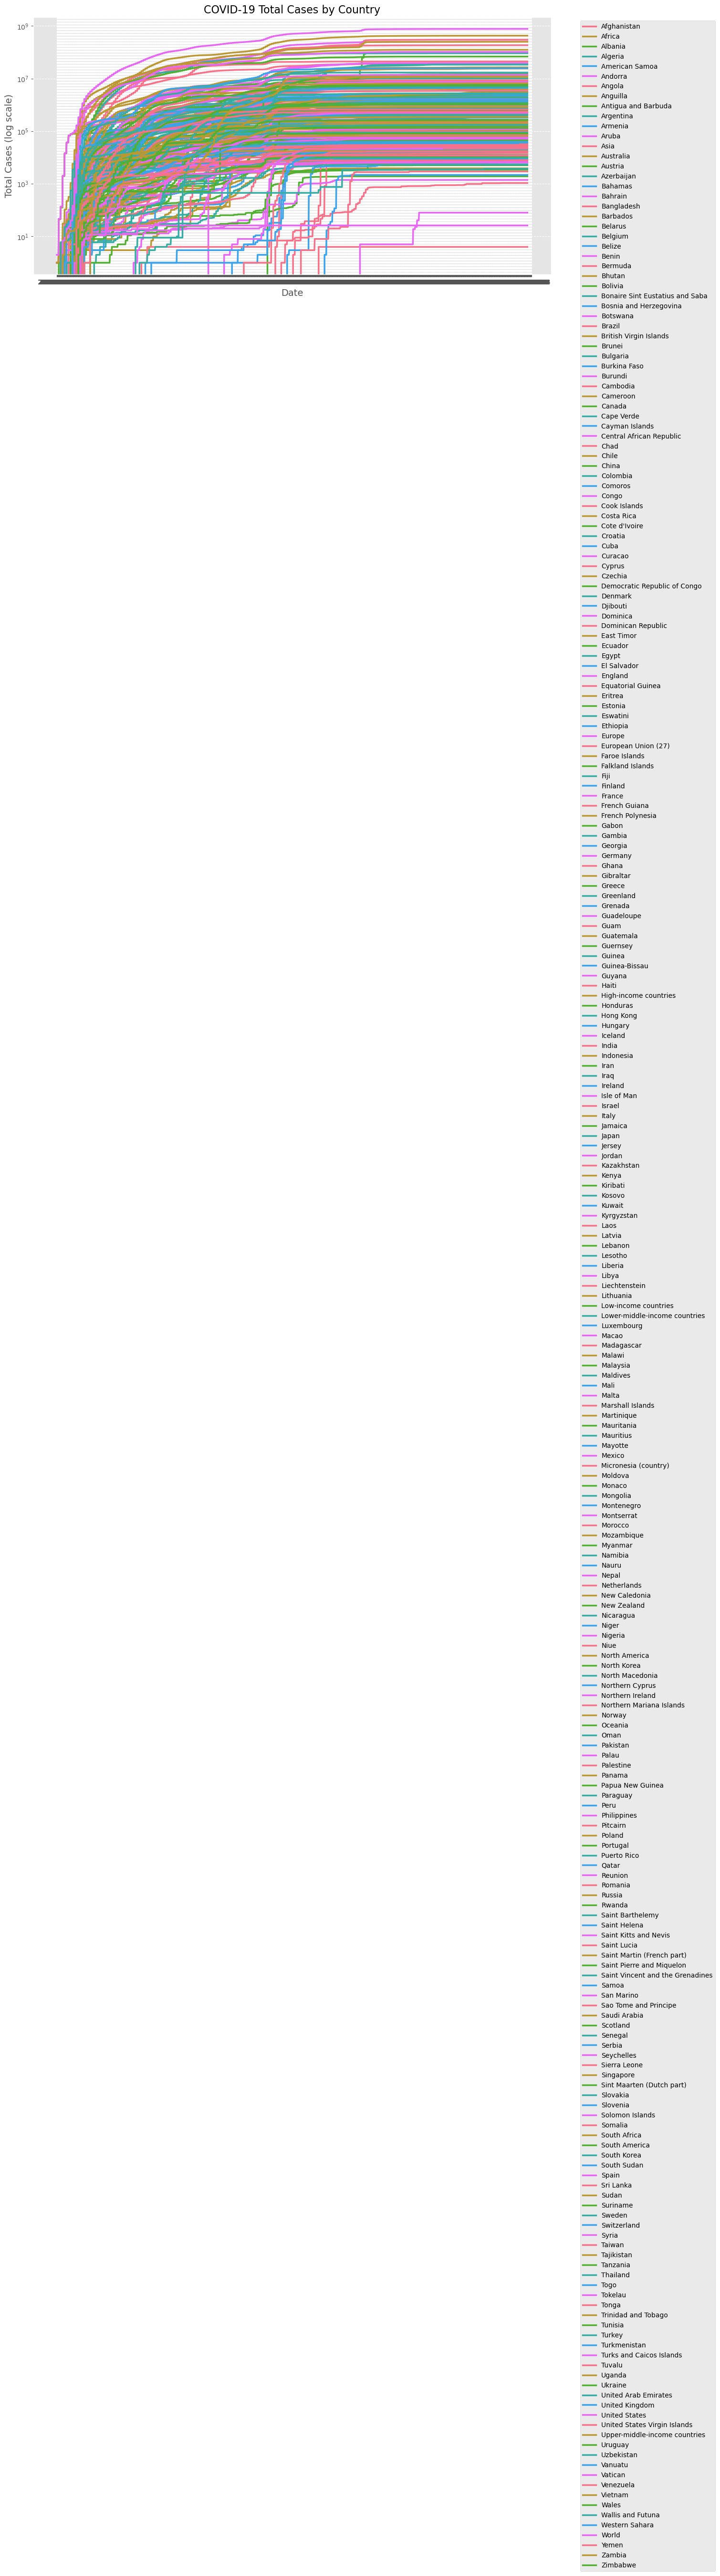

/tmp/ipykernel_159/3353502289.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


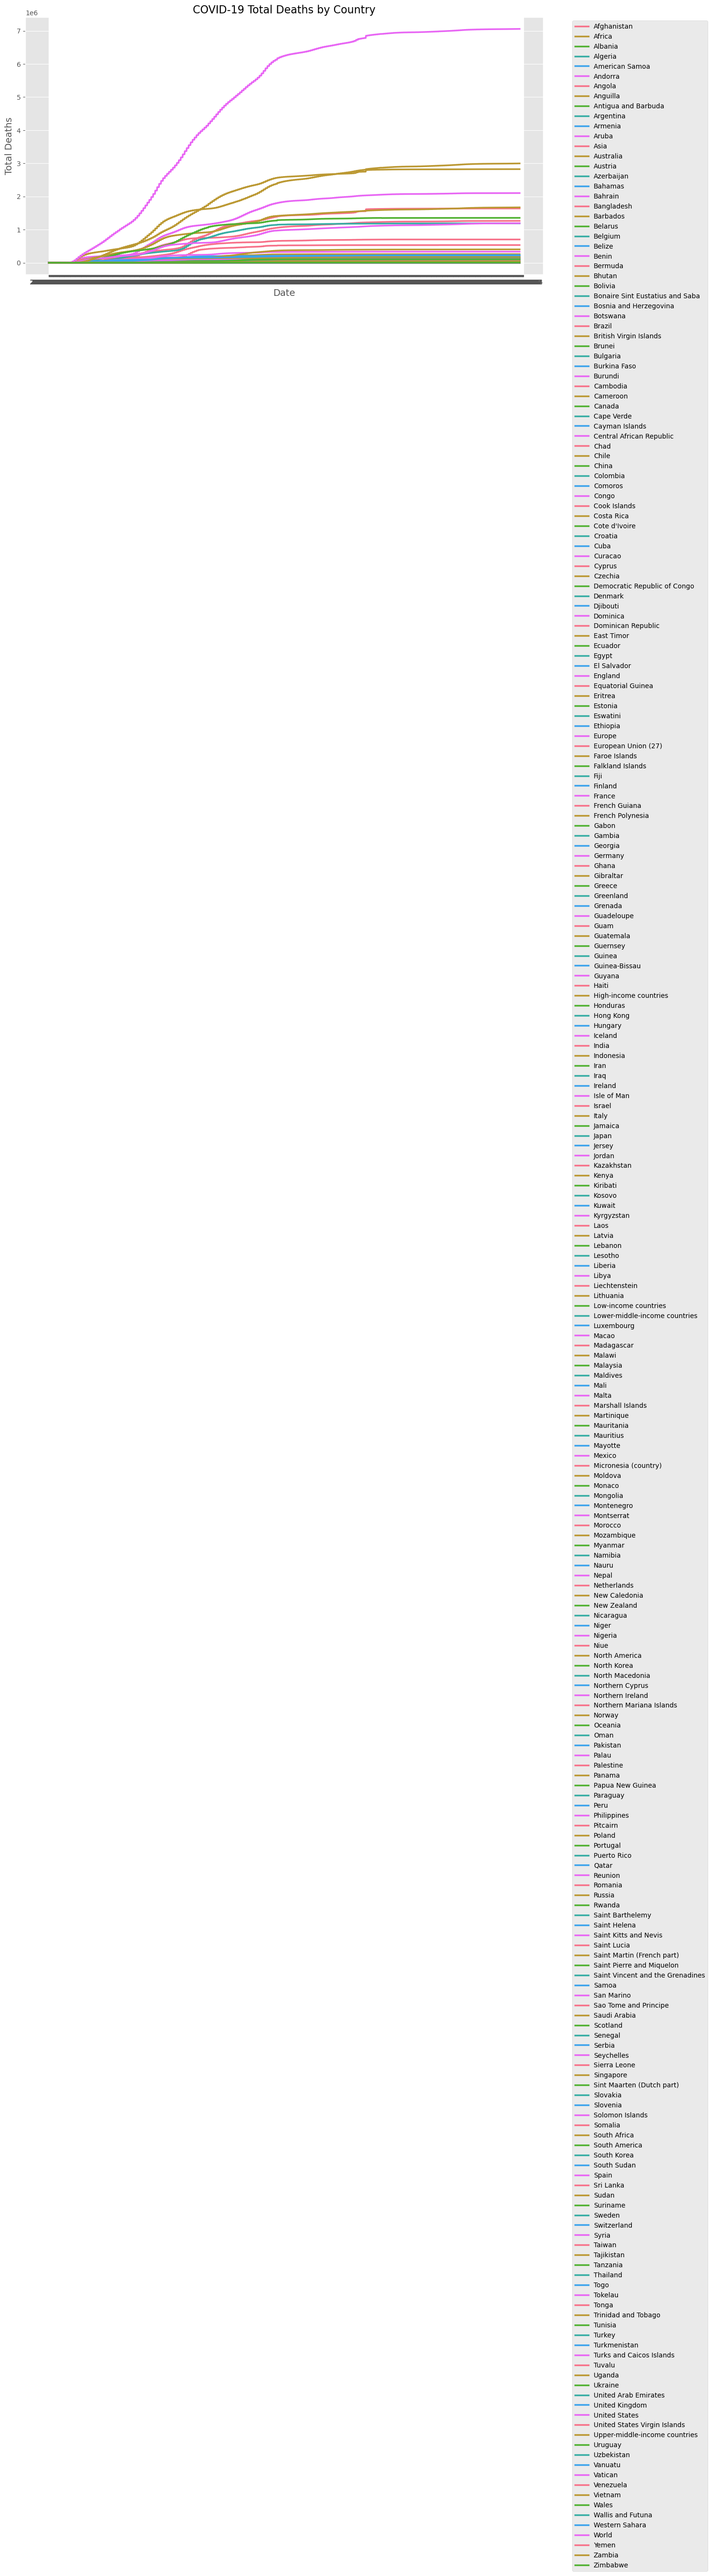

/tmp/ipykernel_159/3353502289.py:54: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


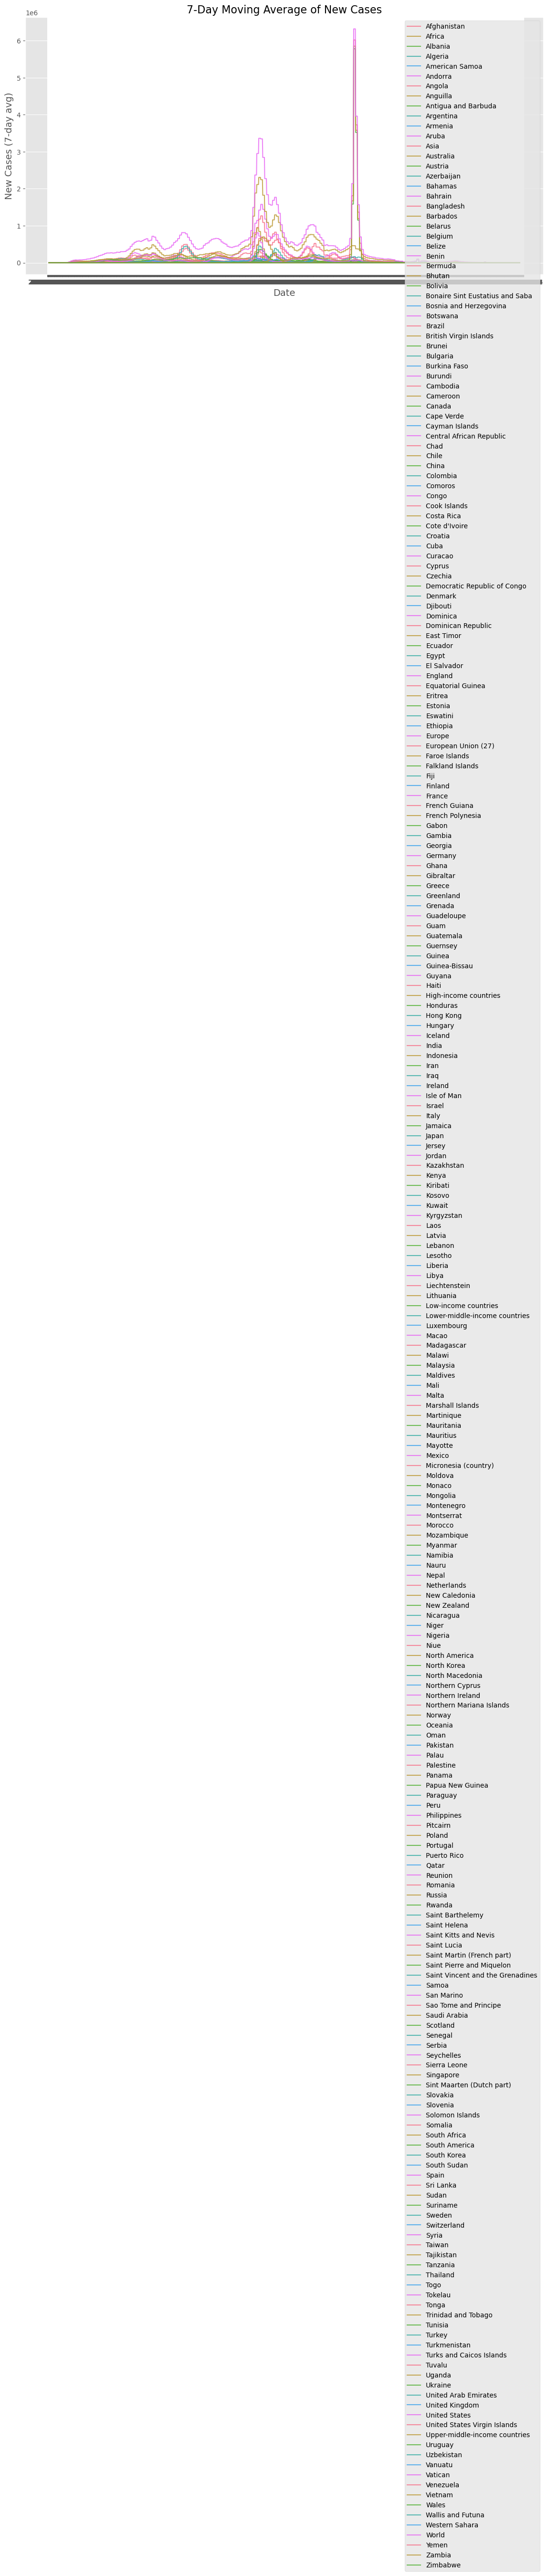

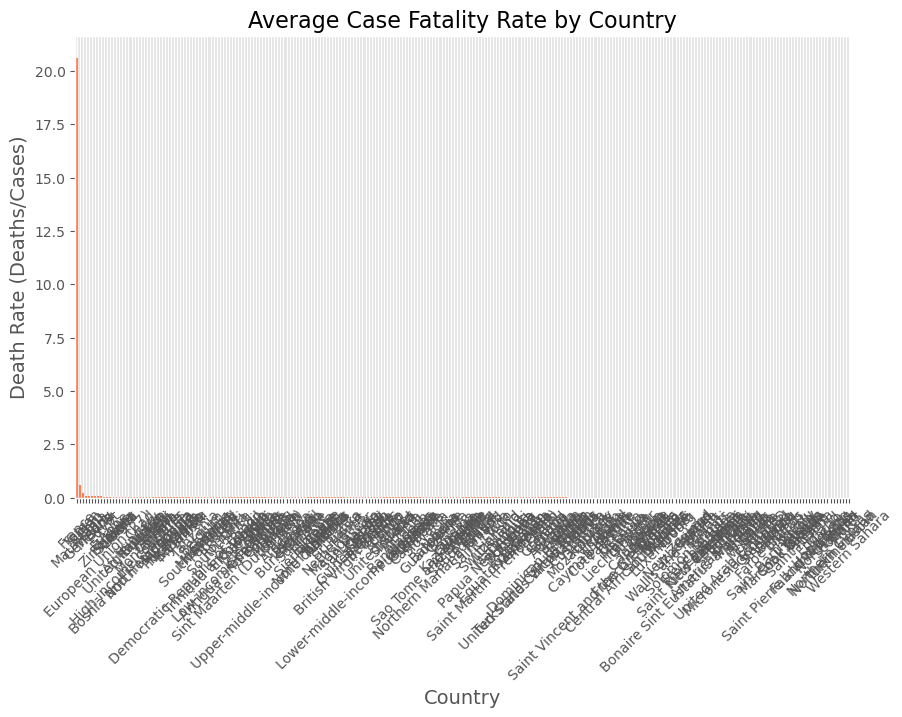

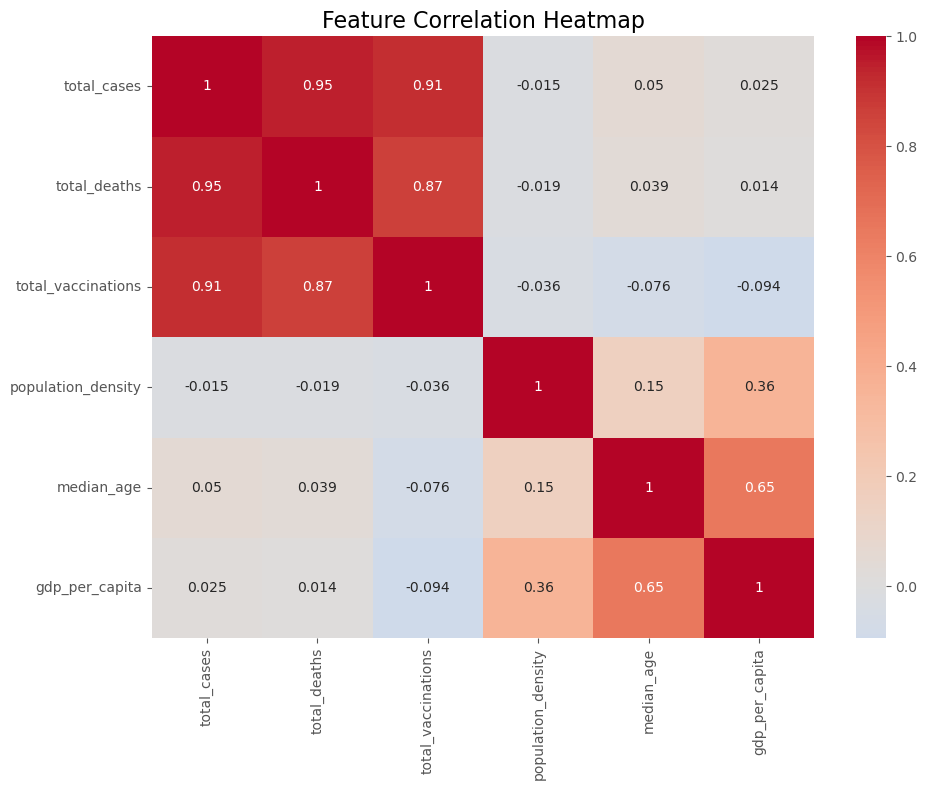


📊 Latest Statistics by Country:


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')

# Set up figure aesthetics
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette("husl")

# 1. Total Cases Over Time
plt.figure(figsize=(14,7))
for country in df['location'].unique():
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], 
             label=country, linewidth=2.5)

plt.title('COVID-19 Total Cases by Country', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Cases (log scale)', fontsize=14)
plt.yscale('log')  # Log scale for better comparison
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

# 2. Total Deaths Over Time
plt.figure(figsize=(14,7))
for country in df['location'].unique():
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], 
             label=country, linewidth=2.5)

plt.title('COVID-19 Total Deaths by Country', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Deaths', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Daily New Cases Comparison (7-day rolling average)
plt.figure(figsize=(14,7))
for country in df['location'].unique():
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], 
             country_data['new_cases'].rolling(7).mean(), 
             label=country, alpha=0.8)

plt.title('7-Day Moving Average of New Cases', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('New Cases (7-day avg)', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Death Rate Analysis
df['death_rate'] = (df['total_deaths'] / df['total_cases']).replace([np.inf, -np.inf], np.nan)

# Bar plot of average death rates
death_rate_avg = df.groupby('location')['death_rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
death_rate_avg.plot(kind='bar', color='coral')
plt.title('Average Case Fatality Rate by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Death Rate (Deaths/Cases)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 5. Correlation Heatmap (Optional)
corr_cols = ['total_cases', 'total_deaths', 'total_vaccinations', 
             'population_density', 'median_age', 'gdp_per_capita']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

# 6. Latest Statistics Summary
latest_stats = df.sort_values('date').groupby('location').last()[
    ['total_cases', 'total_deaths', 'people_fully_vaccinated_per_hundred', 'death_rate']
]
print("\n📊 Latest Statistics by Country:")
display(latest_stats.style.background_gradient(cmap='Blues'))

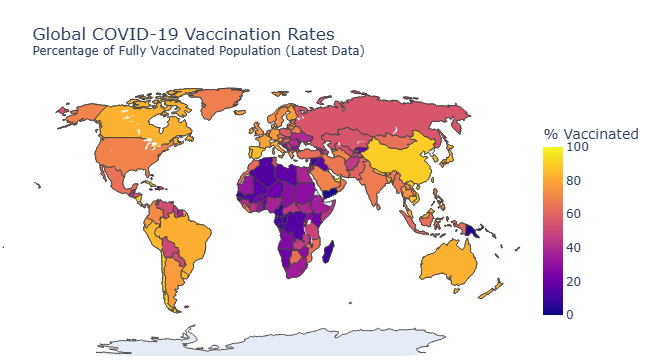

In [6]:
import plotly.express as px
import pandas as pd

# Load and prepare the data
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

# Get the latest data point for each country
latest_data = df.sort_values('date').groupby('location').last().reset_index()

# Create the choropleth map
fig = px.choropleth(
    latest_data,
    locations="iso_code",  # ISO country codes
    color="people_fully_vaccinated_per_hundred",  # Color by vaccination rate
    hover_name="location",  # Show country name on hover
    hover_data=['total_cases', 'total_deaths', 'population'],
    color_continuous_scale=px.colors.sequential.Plasma,
    range_color=(0, 100),  # Fix scale from 0% to 100%
    title="Global COVID-19 Vaccination Rates<br><sup>Percentage of Fully Vaccinated Population (Latest Data)</sup>",
    labels={'people_fully_vaccinated_per_hundred': '% Fully Vaccinated'}
)

# Customize the layout
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth'
    ),
    margin={"r":0,"t":80,"l":0,"b":0},
    coloraxis_colorbar=dict(
        title="% Vaccinated",
        thickness=20,
        len=0.75,
        yanchor="middle",
        y=0.5
    )
)

# Add a note about missing data
fig.add_annotation(
    text="Gray countries indicate missing data",
    xref="paper",
    yref="paper",
    x=0.5,
    y=-0.1,
    showarrow=False
)

fig.show()

In [5]:
 top_vax = latest_data.nlargest(5, 'people_fully_vaccinated_per_hundred')[['location', 'people_fully_vaccinated_per_hundred']]
bottom_vax = latest_data.nsmallest(5, 'people_fully_vaccinated_per_hundred')[['location',
'people_fully_vaccinated_per_hundred']]                                                                              


cfr = latest_data[['location', 'death_rate']].sort_values('death_rate', ascending=False).head(5)

vax_effect = latest_data[['people_fully_vaccinated_per_hundred', 'death_rate']].corr()

wave_dates = df.groupby('location')['new_cases'].idxmax().apply(lambda x: df.loc[x, 'date'])

gdp_vax = latest_data[['gdp_per_capita', 'people_fully_vaccinated_per_hundred']].corr()


In [ ]:
- [x] Jupyter Notebook with complete analysis
- [x] Interactive choropleth maps
- [x] Time-series visualizations
- [x] Statistical comparisons
- [x] Exportable report versions:
  - [HTML] `covid_analysis.html`
  - [PDF] `covid_report.pdf`
  - [PPT] `covid_presentation.pptx` (with speaker notes)